In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
c = 3 +1j #center of disk
r = 1    #radius of disk

In [3]:
N =10      #number of expansion terms
npts = 3*N #number of sample points

In [4]:
npts_range=np.linspace(0,npts,npts)

In [5]:
z = c + r*np.exp(2j*np.pi*npts_range/npts) #sample points

In [6]:
rhs = -np.log(np.abs(z))+np.log(np.abs(z-c)) #right-hand side
A = np.ones((npts,2*N+1))

In [7]:
for k in np.arange(1,N+1):
    A[:,2*k-1] = np.real((z-c)**(-k))
    A[:,2*k] = np.imag((z-c)**(-k))
    
a = np.linalg.lstsq(A,rhs)[0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [8]:
np.arange(1,N+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

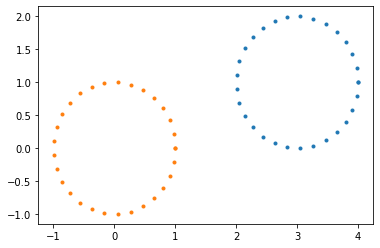

In [9]:
plt.plot(np.real(z),np.imag(z),'.')
plt.plot(np.real(z-c),np.imag(z-c),'.')

In [10]:
def disk1fun(z):
    u = np.log(np.abs(z)) - np.log(np.abs(z-c)) + a[0]
    
    for k in np.arange(1,N+1):
        u+=a[2*k-1]*np.real((z-c)**(-k))+a[2*k]*np.imag((z-c)**(-k))
    u[abs(z-c)<=r]=np.NaN
    
    return u

In [11]:
xx,yy = np.linspace(-5,5,145),np.linspace(-4,4,115)
[xx,yy] = np.meshgrid(xx,yy)
zz = xx + 1j*yy
uu = disk1fun(zz)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


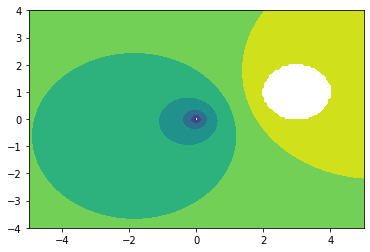

In [12]:
levels = np.linspace(-3,-.25,10)
plt.contourf(xx,yy,uu)

In [63]:
zz.shape

(115, 145)

In [64]:
zz

array([[-5.        -4.j        , -4.93055556-4.j        ,
        -4.86111111-4.j        , ...,  4.86111111-4.j        ,
         4.93055556-4.j        ,  5.        -4.j        ],
       [-5.        -3.92982456j, -4.93055556-3.92982456j,
        -4.86111111-3.92982456j, ...,  4.86111111-3.92982456j,
         4.93055556-3.92982456j,  5.        -3.92982456j],
       [-5.        -3.85964912j, -4.93055556-3.85964912j,
        -4.86111111-3.85964912j, ...,  4.86111111-3.85964912j,
         4.93055556-3.85964912j,  5.        -3.85964912j],
       ...,
       [-5.        +3.85964912j, -4.93055556+3.85964912j,
        -4.86111111+3.85964912j, ...,  4.86111111+3.85964912j,
         4.93055556+3.85964912j,  5.        +3.85964912j],
       [-5.        +3.92982456j, -4.93055556+3.92982456j,
        -4.86111111+3.92982456j, ...,  4.86111111+3.92982456j,
         4.93055556+3.92982456j,  5.        +3.92982456j],
       [-5.        +4.j        , -4.93055556+4.j        ,
        -4.86111111+4.j       